# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-delta'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Saint Kitts and Nevis', 'Holy See'],
 3: ['Fiji', 'Timor-Leste'],
 4: ['Grenada', 'Dominica', 'Tanzania'],
 5: ['Brunei'],
 6: ['Saint Lucia', 'Equatorial Guinea', 'Saint Vincent and the Grenadines'],
 7: ['Sao Tome and Principe', 'Antigua and Barbuda', 'Northern Mariana Islands',
     'Mauritius'],
 8: ['Kyrgyzstan', 'Bahamas', 'Cambodia'],
 9: ['Guam', 'Gambia', 'Botswana', 'Madagascar', 'Zimbabwe', 'Liechtenstein',
     'Seychelles', 'Philippines', 'Trinidad and Tobago', 'Uzbekistan',
     'Vietnam', 'Australia', 'Ethiopia', 'Republic of the Congo', 'Jamaica'],
 10: ['Djibouti', 'Oman', 'Maldives', 'Cape Verde', 'Benin', 'Iceland',
      'Papua New Guinea', 'Guyana', 'Belize', 'Guatemala', 'Taiwan', 'Honduras',
      'Kazakhstan', 'Ghana', 'Kenya', 'Libya', 'Virgin Islands, U.S.',
      'Singapore', 'India', 'Bolivia', 'Angola', 'Monaco', 'Venezuela',
      'Bahrain', 'Iraq', 'Suriname'],
 11: ['Uganda', 'Kuwait', 'Brazil', 'Bangladesh', 'Bhutan', 'Saudi Arabia',
     

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

14

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Italy', 'Canada', 'Malaysia', 'Sweden', 'Romania', 'Belgium', 'Finland',
      'Denmark', 'Switzerland'],
 18: ['Netherlands', 'Norway', 'Portugal', 'United Kingdom'],
 19: ['Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  19Jan2020  22Mar2020    82905782
        1st    Past  23Mar2020  02Apr2020    82905782
        2nd    Past  03Apr2020  20Apr2020    82905782
        3rd    Past  21Apr2020  16Jun2020    82905782
        4th    Past  17Jun2020  15Aug2020    82905782
        5th    Past  16Aug2020  16Sep2020    82905782
        6th    Past  17Sep2020  08Oct2020    82905782
        7th    Past  09Oct2020  20Oct2020    82905782
        8th    Past  21Oct2020  27Oct2020    82905782
        9th    Past  28Oct2020  03Nov2020    82905782
        10th   Past  04Nov2020  10Nov2020    82905782
        11th   Past  11Nov2020  17Nov2020    82905782
        12th   Past  18Nov2020  24Nov2020    82905782
        13th   Past  25Nov2020  01Dec2020    82905782
        14th   Past  02Dec2020  08Dec2020    82905782
        15th   Past  09Dec2020  15Dec2020    82905782
        16th   Past  16Dec2020  21Dec2020    82905782
        17th   Past  22Dec2020  28Dec2020    82905782
        18th   Past  29Dec2020  06Jan2021    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DNK,  1st phase (06Apr2020 - 05May2020): finished  171 trials in 0 min 10 sec

	NOR,  0th phase (10Mar2020 - 25Mar2020): finished  180 trials in 0 min 10 sec

	NOR, 17th phase (29Dec2020 - 06Jan2021): finished  184 trials in 0 min 10 sec

	ITA, 13th phase (10Dec2020 - 15Dec2020): finished  189 trials in 0 min 10 sec

	DEU,  1st phase (23Mar2020 - 02Apr2020): finished  224 trials in 0 min 10 sec

	BEL, 16th phase (20Dec2020 - 06Jan2021): finished  205 trials in 0 min 10 sec

	MYS,  3rd phase (25May2020 - 09Sep2020): finished  179 trials in 0 min 10 sec

	SWE,  1st phase (16Apr2020 - 12May2020): finished  184 trials in 0 min 10 sec

	CHE,  5th phase (25Aug2020 - 14Sep2020): finished  201 trials in 0 min 10 sec

	DNK, 13th phase (01Dec2020 - 10Dec2020): finished  197 trials in 0 min 10 sec

	ITA,  7th phase (16Oct2020 - 22Oct2020): finished  203 trials in 0 min 10 sec

	ROU,  5th phase (24Sep2020 - 08Oct2020): finished  203 trials in 0 min 10 sec

	CHE,  2nd phase (31Mar2020 - 14Apr2020): finished  185 trials in 0 min 10 sec

	ITA,  3rd phase (17Apr2020 - 10May2020): finished  188 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  173 trials in 0 min 10 sec

	FIN,  9th phase (29Oct2020 - 08Nov2020): finished  190 trials in 0 min 10 sec

	NOR, 10th phase (04Nov2020 - 09Nov2020): finished  180 trials in 0 min 10 sec

	MYS,  6th phase (13Oct2020 - 18Oct2020): finished  186 trials in 0 min 10 sec

	NOR, 11th phase (10Nov2020 - 22Nov2020): finished  184 trials in 0 min 10 sec

	ITA,  6th phase (02Oct2020 - 15Oct2020): finished  181 trials in 0 min 10 sec

	PRT,  8th phase (22Oct2020 - 28Oct2020): finished  238 trials in 0 min 10 sec

	MYS, 10th phase (12Nov2020 - 17Nov2020): finished  241 trials in 0 min 10 sec

	BEL, 10th phase (26Oct2020 - 31Oct2020): finished  251 trials in 0 min 10 sec

	FIN, 15th phase (17Dec2020 - 27Dec2020): finished  245 trials in 0 min 10 sec

	DEU,  3rd phase (21Apr2020 - 16Jun2020): finished  276 trials in 0 min 10 sec

	MYS, 14th phase (15Dec2020 - 24Dec2020): finished  291 trials in 0 min 10 sec

	CAN, 15th phase (20Dec2020 - 27Dec2020): finished  305 trials in 0 min 10 sec

	CHE,  6th phase (15Sep2020 - 05Oct2020): finished  283 trials in 0 min 10 sec

	CHE,  4th phase (23Jul2020 - 24Aug2020): finished  257 trials in 0 min 10 sec

	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  267 trials in 0 min 10 sec

	MYS,  0th phase (11Feb2020 - 25Mar2020): finished  269 trials in 0 min 10 sec

	NOR, 15th phase (15Dec2020 - 21Dec2020): finished  273 trials in 0 min 10 sec

	CAN,  3rd phase (26May2020 - 19Jul2020): finished  267 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 26May2020): finished  279 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  277 trials in 0 min 10 sec

	BEL,  0th phase (04Mar2020 - 29Mar2020): finished  274 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  268 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 02May2020): finished  274 trials in 0 min 10 sec

	FIN,  5th phase (21Aug2020 - 22Sep2020): finished  271 trials in 0 min 10 sec

	ITA,  1st phase (20Mar2020 - 31Mar2020): finished  268 trials in 0 min 10 sec

	SWE,  6th phase (05Oct2020 - 26Oct2020): finished  246 trials in 0 min 10 sec

	SWE, 13th phase (09Dec2020 - 15Dec2020): finished  259 trials in 0 min 10 sec

	MYS, 13th phase (05Dec2020 - 14Dec2020): finished  248 trials in 0 min 10 sec

	DNK,  0th phase (06Mar2020 - 05Apr2020): finished  246 trials in 0 min 10 sec

	MYS,  5th phase (04Oct2020 - 12Oct2020): finished  287 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 23Apr2020): finished  301 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  312 trials in 0 min 10 sec

	CHE,  1st phase (22Mar2020 - 30Mar2020): finished  303 trials in 0 min 10 sec

	DNK, 14th phase (11Dec2020 - 20Dec2020): finished  308 trials in 0 min 10 sec

	ITA,  5th phase (29Aug2020 - 01Oct2020): finished  277 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 19Mar2020): finished  280 trials in 0 min 10 sec

	DNK,  6th phase (08Oct2020 - 20Oct2020): finished  292 trials in 0 min 10 sec

	ROU,  4th phase (02Sep2020 - 23Sep2020): finished  259 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  256 trials in 0 min 10 sec

	NOR,  9th phase (29Oct2020 - 03Nov2020): finished  265 trials in 0 min 10 sec

	PRT,  6th phase (25Sep2020 - 12Oct2020): finished  273 trials in 0 min 10 sec

	PRT, 11th phase (15Nov2020 - 25Nov2020): finished  261 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  257 trials in 0 min 10 sec

	MYS,  7th phase (19Oct2020 - 24Oct2020): finished  270 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  262 trials in 0 min 10 sec

	ROU,  0th phase (04Mar2020 - 06May2020): finished  211 trials in 0 min 10 sec

	CHE, 12th phase (15Nov2020 - 24Nov2020): finished  220 trials in 0 min 10 sec

	NLD,  5th phase (07Oct2020 - 13Oct2020): finished  224 trials in 0 min 10 sec

	SWE,  8th phase (04Nov2020 - 10Nov2020): finished  220 trials in 0 min 10 sec

	CAN, 14th phase (13Dec2020 - 19Dec2020): finished  239 trials in 0 min 10 sec

	CAN,  4th phase (20Jul2020 - 06Sep2020): finished  225 trials in 0 min 10 sec

	SWE, 14th phase (16Dec2020 - 21Dec2020): finished  238 trials in 0 min 10 sec

	DEU,  2nd phase (03Apr2020 - 20Apr2020): finished  229 trials in 0 min 10 sec

	NLD, 17th phase (30Dec2020 - 06Jan2021): finished  234 trials in 0 min 10 sec

	CHE, 16th phase (21Dec2020 - 06Jan2021): finished  234 trials in 0 min 10 sec

	MYS, 15th phase (25Dec2020 - 30Dec2020): finished  245 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  230 trials in 0 min 10 sec

	ITA,  4th phase (11May2020 - 28Aug2020): finished  196 trials in 0 min 10 sec

	ITA,  2nd phase (01Apr2020 - 16Apr2020): finished  229 trials in 0 min 10 sec

	NLD,  2nd phase (08Aug2020 - 12Sep2020): finished  229 trials in 0 min 10 sec

	CHE,  3rd phase (15Apr2020 - 22Jul2020): finished  207 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  178 trials in 0 min 10 sec

	SWE,  0th phase (21Feb2020 - 15Apr2020): finished  188 trials in 0 min 10 sec

	CAN,  8th phase (25Oct2020 - 04Nov2020): finished  190 trials in 0 min 10 sec

	SWE,  5th phase (13Aug2020 - 04Oct2020): finished  189 trials in 0 min 10 sec

	BEL, 14th phase (26Nov2020 - 07Dec2020): finished  217 trials in 0 min 10 sec

	DEU,  8th phase (21Oct2020 - 27Oct2020): finished  237 trials in 0 min 10 sec

	BEL, 11th phase (01Nov2020 - 07Nov2020): finished  228 trials in 0 min 10 sec

	NLD,  6th phase (14Oct2020 - 19Oct2020): finished  229 trials in 0 min 10 sec

	ROU, 15th phase (17Dec2020 - 26Dec2020): finished  231 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  232 trials in 0 min 10 sec

	DEU,  4th phase (17Jun2020 - 15Aug2020): finished  219 trials in 0 min 10 sec

	NOR,  7th phase (06Oct2020 - 20Oct2020): finished  233 trials in 0 min 10 sec

	BEL,  4th phase (04Aug2020 - 12Sep2020): finished  225 trials in 0 min 10 sec

	NOR,  3rd phase (03May2020 - 05Aug2020): finished  210 trials in 0 min 10 sec

	NLD,  3rd phase (13Sep2020 - 26Sep2020): finished  236 trials in 0 min 10 sec

	ITA, 14th phase (16Dec2020 - 22Dec2020): finished  237 trials in 0 min 10 sec

	SWE, 10th phase (18Nov2020 - 24Nov2020): finished  243 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 20Aug2020): finished  215 trials in 0 min 10 sec

	ITA, 10th phase (12Nov2020 - 21Nov2020): finished  249 trials in 0 min 10 sec

	SWE, 11th phase (25Nov2020 - 01Dec2020): finished  236 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 07Aug2020): finished  207 trials in 0 min 10 sec

	NLD,  7th phase (20Oct2020 - 29Oct2020): finished  235 trials in 0 min 10 sec

	CAN, 16th phase (28Dec2020 - 06Jan2021): finished  228 trials in 0 min 10 sec

	DEU,  9th phase (28Oct2020 - 03Nov2020): finished  250 trials in 0 min 10 sec

	CAN,  9th phase (05Nov2020 - 13Nov2020): finished  239 trials in 0 min 10 sec

	FIN, 10th phase (09Nov2020 - 18Nov2020): finished  237 trials in 0 min 10 sec

	ITA, 11th phase (22Nov2020 - 02Dec2020): finished  232 trials in 0 min 10 sec

	PRT,  2nd phase (24Apr2020 - 05Jun2020): finished  224 trials in 0 min 10 sec

	MYS, 16th phase (31Dec2020 - 06Jan2021): finished  231 trials in 0 min 10 sec

	CHE,  7th phase (06Oct2020 - 13Oct2020): finished  234 trials in 0 min 10 sec

	NOR, 16th phase (22Dec2020 - 28Dec2020): finished  233 trials in 0 min 10 sec

	BEL,  9th phase (20Oct2020 - 25Oct2020): finished  231 trials in 0 min 10 sec

	DNK, 12th phase (25Nov2020 - 30Nov2020): finished  226 trials in 0 min 10 sec

	CHE,  0th phase (03Mar2020 - 21Mar2020): finished  232 trials in 0 min 10 sec

	FIN,  8th phase (19Oct2020 - 28Oct2020): finished  229 trials in 0 min 10 sec

	NLD,  1st phase (16Apr2020 - 07Aug2020): finished  209 trials in 0 min 10 sec

	GBR,  5th phase (17Sep2020 - 02Oct2020): finished  229 trials in 0 min 10 sec

	NOR,  8th phase (21Oct2020 - 28Oct2020): finished  235 trials in 0 min 10 sec

	CAN, 12th phase (29Nov2020 - 05Dec2020): finished  226 trials in 0 min 10 sec

	PRT, 10th phase (05Nov2020 - 14Nov2020): finished  231 trials in 0 min 10 sec

	NOR,  6th phase (20Sep2020 - 05Oct2020): finished  239 trials in 0 min 10 sec

	FIN,  6th phase (23Sep2020 - 07Oct2020): finished  225 trials in 0 min 10 sec

	CHE, 11th phase (09Nov2020 - 14Nov2020): finished  241 trials in 0 min 10 sec

	SWE,  3rd phase (08Jun2020 - 24Jun2020): finished  239 trials in 0 min 10 sec

	ITA, 15th phase (23Dec2020 - 29Dec2020): finished  233 trials in 0 min 10 sec

	NOR,  1st phase (26Mar2020 - 05Apr2020): finished  230 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  220 trials in 0 min 10 sec

	BEL,  3rd phase (10May2020 - 03Aug2020): finished  215 trials in 0 min 10 sec

	CHE, 10th phase (30Oct2020 - 08Nov2020): finished  225 trials in 0 min 10 sec

	ROU, 12th phase (25Nov2020 - 02Dec2020): finished  235 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 09May2020): finished  227 trials in 0 min 10 sec

	GBR, 15th phase (11Dec2020 - 16Dec2020): finished  229 trials in 0 min 10 sec

	NLD, 13th phase (06Dec2020 - 11Dec2020): finished  229 trials in 0 min 10 sec

	MYS, 12th phase (29Nov2020 - 04Dec2020): finished  227 trials in 0 min 10 sec

	SWE, 12th phase (02Dec2020 - 08Dec2020): finished  228 trials in 0 min 10 sec

	MYS,  9th phase (31Oct2020 - 11Nov2020): finished  230 trials in 0 min 10 sec

	CAN, 13th phase (06Dec2020 - 12Dec2020): finished  229 trials in 0 min 10 sec

	MYS, 11th phase (18Nov2020 - 28Nov2020): finished  237 trials in 0 min 10 sec

	ROU,  1st phase (07May2020 - 16Jul2020): finished  221 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  242 trials in 0 min 10 sec

	CAN,  0th phase (27Feb2020 - 11Apr2020): finished  223 trials in 0 min 10 sec

	NLD,  9th phase (05Nov2020 - 11Nov2020): finished  246 trials in 0 min 10 sec

	BEL, 15th phase (08Dec2020 - 19Dec2020): finished  235 trials in 0 min 10 sec

	CAN,  1st phase (12Apr2020 - 01May2020): finished  231 trials in 0 min 10 sec

	ROU,  2nd phase (17Jul2020 - 09Aug2020): finished  230 trials in 0 min 10 sec

	PRT, 12th phase (26Nov2020 - 02Dec2020): finished  233 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 22Mar2020): finished  230 trials in 0 min 10 sec

	DNK,  2nd phase (06May2020 - 07Aug2020): finished  221 trials in 0 min 10 sec

	ROU,  6th phase (09Oct2020 - 19Oct2020): finished  233 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 19Sep2020): finished  240 trials in 0 min 10 sec

	NLD, 12th phase (28Nov2020 - 05Dec2020): finished  233 trials in 0 min 10 sec

	SWE,  7th phase (27Oct2020 - 03Nov2020): finished  231 trials in 0 min 10 sec

	NLD, 16th phase (24Dec2020 - 29Dec2020): finished  241 trials in 0 min 10 sec

	MYS,  1st phase (26Mar2020 - 12Apr2020): finished  236 trials in 0 min 10 sec

	ROU, 14th phase (09Dec2020 - 16Dec2020): finished  237 trials in 0 min 10 sec

	PRT,  4th phase (10Jul2020 - 31Aug2020): finished  231 trials in 0 min 10 sec

	NLD, 10th phase (12Nov2020 - 19Nov2020): finished  241 trials in 0 min 10 sec

	MYS,  8th phase (25Oct2020 - 30Oct2020): finished  234 trials in 0 min 10 sec

	CAN,  6th phase (29Sep2020 - 11Oct2020): finished  228 trials in 0 min 10 sec

	CAN, 11th phase (22Nov2020 - 28Nov2020): finished  233 trials in 0 min 10 sec

	SWE,  9th phase (11Nov2020 - 17Nov2020): finished  227 trials in 0 min 10 sec

	ROU, 13th phase (03Dec2020 - 08Dec2020): finished  253 trials in 0 min 10 sec

	MYS,  2nd phase (13Apr2020 - 24May2020): finished  227 trials in 0 min 10 sec

	NLD, 14th phase (12Dec2020 - 17Dec2020): finished  237 trials in 0 min 10 sec

	SWE,  2nd phase (13May2020 - 07Jun2020): finished  228 trials in 0 min 10 sec

	NLD,  4th phase (27Sep2020 - 06Oct2020): finished  240 trials in 0 min 10 sec

	MYS,  4th phase (10Sep2020 - 03Oct2020): finished  240 trials in 0 min 10 sec

	ROU,  7th phase (20Oct2020 - 28Oct2020): finished  234 trials in 0 min 10 sec

	ROU,  3rd phase (10Aug2020 - 01Sep2020): finished  223 trials in 0 min 10 sec

	NLD,  8th phase (30Oct2020 - 04Nov2020): finished  237 trials in 0 min 10 sec

	PRT,  3rd phase (06Jun2020 - 09Jul2020): finished  223 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 25Nov2020): finished  225 trials in 0 min 10 sec

	ROU,  8th phase (29Oct2020 - 04Nov2020): finished  222 trials in 0 min 10 sec

	GBR, 14th phase (03Dec2020 - 10Dec2020): finished  237 trials in 0 min 10 sec

	ITA,  8th phase (23Oct2020 - 01Nov2020): finished  227 trials in 0 min 10 sec

	BEL,  7th phase (08Oct2020 - 13Oct2020): finished  250 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  218 trials in 0 min 10 sec

	PRT,  5th phase (01Sep2020 - 24Sep2020): finished  230 trials in 0 min 10 sec

	BEL,  6th phase (29Sep2020 - 07Oct2020): finished  223 trials in 0 min 10 sec

	ITA,  9th phase (02Nov2020 - 11Nov2020): finished  232 trials in 0 min 10 sec

	DNK, 15th phase (21Dec2020 - 30Dec2020): finished  255 trials in 0 min 10 sec

	CAN, 10th phase (14Nov2020 - 21Nov2020): finished  249 trials in 0 min 10 sec

	DNK,  4th phase (11Sep2020 - 23Sep2020): finished  257 trials in 0 min 10 sec

	CAN,  7th phase (12Oct2020 - 24Oct2020): finished  277 trials in 0 min 10 sec

	SWE,  4th phase (25Jun2020 - 12Aug2020): finished  260 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  270 trials in 0 min 10 sec

	GBR,  4th phase (08Aug2020 - 16Sep2020): finished  288 trials in 0 min 10 sec

	DNK,  3rd phase (08Aug2020 - 10Sep2020): finished  283 trials in 0 min 10 sec

	FIN, 11th phase (19Nov2020 - 25Nov2020): finished  292 trials in 0 min 10 sec

	ROU, 16th phase (27Dec2020 - 06Jan2021): finished  255 trials in 0 min 10 sec

	CAN,  2nd phase (02May2020 - 25May2020): finished  261 trials in 0 min 10 sec

	CAN,  5th phase (07Sep2020 - 28Sep2020): finished  266 trials in 0 min 10 sec

	FIN,  7th phase (08Oct2020 - 18Oct2020): finished  260 trials in 0 min 10 sec

	ITA, 12th phase (03Dec2020 - 09Dec2020): finished  266 trials in 0 min 10 sec

	BEL,  5th phase (13Sep2020 - 28Sep2020): finished  261 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 15Apr2020): finished  248 trials in 0 min 10 sec

	BEL, 12th phase (08Nov2020 - 15Nov2020): finished  257 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  243 trials in 0 min 10 sec

	BEL,  1st phase (30Mar2020 - 13Apr2020): finished  257 trials in 0 min 10 sec

	DNK,  5th phase (24Sep2020 - 07Oct2020): finished  257 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  261 trials in 0 min 10 sec

	NLD, 15th phase (18Dec2020 - 23Dec2020): finished  247 trials in 0 min 10 sec

	FIN, 12th phase (26Nov2020 - 01Dec2020): finished  246 trials in 0 min 10 sec

	NLD, 11th phase (20Nov2020 - 27Nov2020): finished  246 trials in 0 min 10 sec

Completed optimization. Total: 9 min 29 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Germany 0th    Past  19Jan2020  22Mar2020    82905782  SIR-F  7.53   
        1st    Past  23Mar2020  02Apr2020    82905782  SIR-F  7.24   
        2nd    Past  03Apr2020  20Apr2020    82905782  SIR-F   0.6   
        3rd    Past  21Apr2020  16Jun2020    82905782  SIR-F  0.51   
        4th    Past  17Jun2020  15Aug2020    82905782  SIR-F   1.2   
        5th    Past  16Aug2020  16Sep2020    82905782  SIR-F  1.31   
        6th    Past  17Sep2020  08Oct2020    82905782  SIR-F  1.32   
        7th    Past  09Oct2020  20Oct2020    82905782  SIR-F  3.13   
        8th    Past  21Oct2020  27Oct2020    82905782  SIR-F  3.03   
        9th    Past  28Oct2020  03Nov2020    82905782  SIR-F  2.25   
        10th   Past  04Nov2020  10Nov2020    82905782      -     -   
        11th   Past  11Nov2020  17Nov2020    82905782      -     -   
        12th   Past  18Nov2020  24Nov2020    82905782      -     -   
        13th   Past  25Nov2020  01Dec2020    82905782      -     -   
        14th   Past  02Dec2020  08Dec2020    82905782      -     -   
        15th   Past  09Dec2020  15Dec2020    82905782      -     -   
        16th   Past  16Dec2020  21Dec2020    82905782      -     -   
        17th   Past  22Dec2020  28Dec2020    82905782      -     -   
        18th   Past  29Dec2020  06Jan2021    82905782      -     -   

                     theta        kappa        rho       sigma  tau  \
Country Phase                                                         
Germany 0th    0.000269903   0.00105293  0.0173787  0.00125572  360   
        1st         0.0197  0.000753584  0.0279621   0.0030307  360   
        2nd        0.03889  0.000481933  0.0122503   0.0192013  360   
        3rd       0.018989  4.05844e-05  0.0113435   0.0216025  360   
        4th      0.0216311   0.00030038  0.0174769   0.0139732  360   
        5th     0.00156721  0.000191478  0.0163103   0.0122368  360   
        6th    0.000501427  9.63532e-05  0.0183905   0.0137995  360   
        7th    0.000676492  6.74045e-05   0.025769  0.00816065  360   
        8th     0.00261679  0.000301315  0.0272963  0.00869185  360   
        9th    0.000120584   0.00022902  0.0181476  0.00781872  360   
        10th             -            -          -           -    -   
        11th             -            -          -           -    -   
        12th             -            -          -           -    -   
        13th             -            -          -           -    -   
        14th             -            -          -           -    -   
        15th             -            -          -           -    -   
        16th             -            -          -           -    -   
        17th             -            -          -           -    -   
        18th             -            -          -           -    -   

              alpha1 [-] 1/beta [day] 1/alpha2 [day] 1/gamma [day]      RMSLE  \
Country Phase                                                                   
Germany 0th            0           14            237           199    1.39835   
        1st         0.02            8            331            82   0.154537   
        2nd        0.039           20            518            13   0.149051   
        3rd        0.019           22           6159            11  0.0866529   
        4th        0.022           14            832            17   0.120032   
        5th        0.002           15           1305            20  0.0643947   
        6th        0.001           13           2594            18  0.0290327   
        7th        0.001            9           3708            30  0.0650893   
        8th        0.003            9            829            28  0.0196056   
        9th            0           13           1091            31  0.0370512   
        10th           -            -              -             -          -   

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-16,Netherlands,0.0773327,0.000381158,0.0349756,0.00331233,0.077,655,7,75,...,2,3,0,1,1,0,2,1,1,62.04
1,2020-03-16,Netherlands,0.0773327,0.000381158,0.0349756,0.00331233,0.077,655,7,75,...,2,3,0,1,1,0,2,1,1,62.04
2,2020-03-16,Netherlands,0.0773327,0.000381158,0.0349756,0.00331233,0.077,655,7,75,...,2,3,0,1,1,0,2,1,1,62.04
3,2020-03-16,Netherlands,0.0773327,0.000381158,0.0349756,0.00331233,0.077,655,7,75,...,2,3,0,1,1,0,2,1,1,62.04
4,2020-03-16,Netherlands,0.0773327,0.000381158,0.0349756,0.00331233,0.077,655,7,75,...,2,3,0,1,1,0,2,1,1,62.04


### $Rt$: Reprodcution number $\mathrm{[-]}$

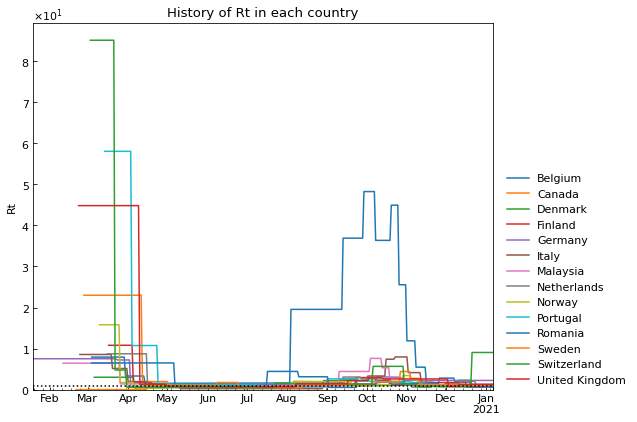

Country,Belgium,Canada,Denmark,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Romania,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2021-01-02,1.28,1.13,0.89,0.63,2.25,0.71,1.33,0.68,1.21,0.8,0.76,1.08,9.06,1.28
2021-01-03,1.28,1.13,0.89,0.63,2.25,0.71,1.33,0.68,1.21,0.8,0.76,1.08,9.06,1.28
2021-01-04,1.28,1.13,0.89,0.63,2.25,0.71,1.33,0.68,1.21,0.8,0.76,1.08,9.06,1.28
2021-01-05,1.28,1.13,0.89,0.63,2.25,0.71,1.33,0.68,1.21,0.8,0.76,1.08,9.06,1.28
2021-01-06,1.28,1.13,0.89,0.63,2.25,0.71,1.33,0.68,1.21,0.8,0.76,1.08,9.06,1.28


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

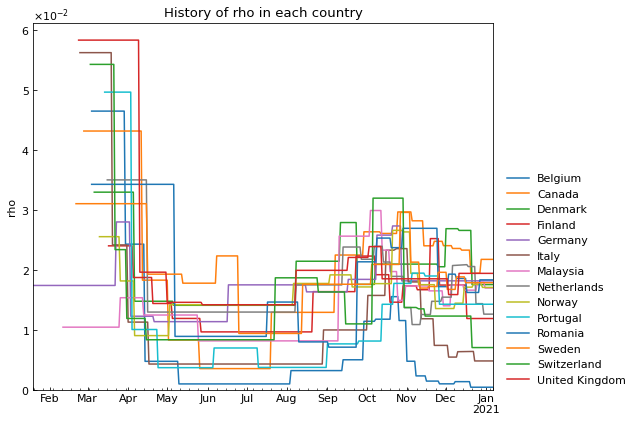

Country,Belgium,Canada,Denmark,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Romania,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2021-01-02,0.000414,0.021726,0.017521,0.011867,0.018148,0.004793,0.01695,0.012596,0.017054,0.014246,0.018311,0.017832,0.007024,0.019393
2021-01-03,0.000414,0.021726,0.017521,0.011867,0.018148,0.004793,0.01695,0.012596,0.017054,0.014246,0.018311,0.017832,0.007024,0.019393
2021-01-04,0.000414,0.021726,0.017521,0.011867,0.018148,0.004793,0.01695,0.012596,0.017054,0.014246,0.018311,0.017832,0.007024,0.019393
2021-01-05,0.000414,0.021726,0.017521,0.011867,0.018148,0.004793,0.01695,0.012596,0.017054,0.014246,0.018311,0.017832,0.007024,0.019393
2021-01-06,0.000414,0.021726,0.017521,0.011867,0.018148,0.004793,0.01695,0.012596,0.017054,0.014246,0.018311,0.017832,0.007024,0.019393


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

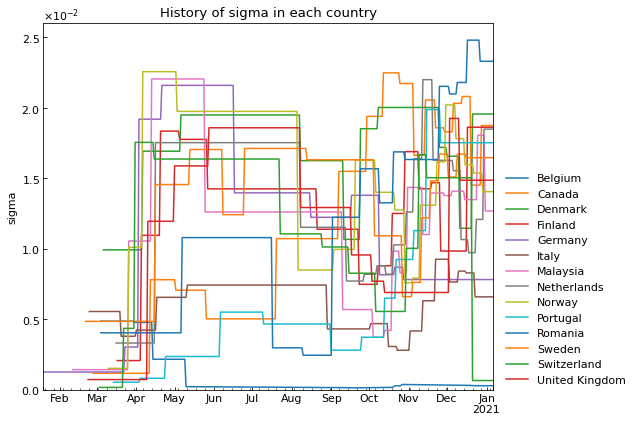

Country,Belgium,Canada,Denmark,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Romania,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2021-01-02,0.000282,0.01875,0.019568,0.018631,0.007819,0.006589,0.012687,0.018496,0.014058,0.01753,0.023312,0.016469,0.000651,0.014869
2021-01-03,0.000282,0.01875,0.019568,0.018631,0.007819,0.006589,0.012687,0.018496,0.014058,0.01753,0.023312,0.016469,0.000651,0.014869
2021-01-04,0.000282,0.01875,0.019568,0.018631,0.007819,0.006589,0.012687,0.018496,0.014058,0.01753,0.023312,0.016469,0.000651,0.014869
2021-01-05,0.000282,0.01875,0.019568,0.018631,0.007819,0.006589,0.012687,0.018496,0.014058,0.01753,0.023312,0.016469,0.000651,0.014869
2021-01-06,0.000282,0.01875,0.019568,0.018631,0.007819,0.006589,0.012687,0.018496,0.014058,0.01753,0.023312,0.016469,0.000651,0.014869


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

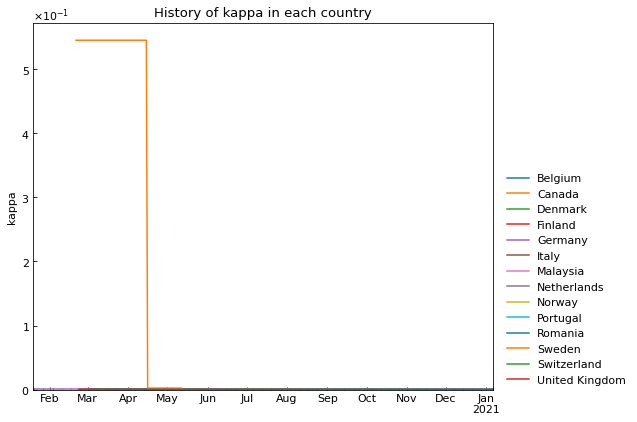

Country,Belgium,Canada,Denmark,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Romania,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2021-01-02,0.000002,0.000191,0.000093,0.000191,0.000229,0.000192,0.000067,0.000093,0.000002,0.00015,0.000712,0.000014,0.000059,0.000014
2021-01-03,0.000002,0.000191,0.000093,0.000191,0.000229,0.000192,0.000067,0.000093,0.000002,0.00015,0.000712,0.000014,0.000059,0.000014
2021-01-04,0.000002,0.000191,0.000093,0.000191,0.000229,0.000192,0.000067,0.000093,0.000002,0.00015,0.000712,0.000014,0.000059,0.000014
2021-01-05,0.000002,0.000191,0.000093,0.000191,0.000229,0.000192,0.000067,0.000093,0.000002,0.00015,0.000712,0.000014,0.000059,0.000014
2021-01-06,0.000002,0.000191,0.000093,0.000191,0.000229,0.000192,0.000067,0.000093,0.000002,0.00015,0.000712,0.000014,0.000059,0.000014


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

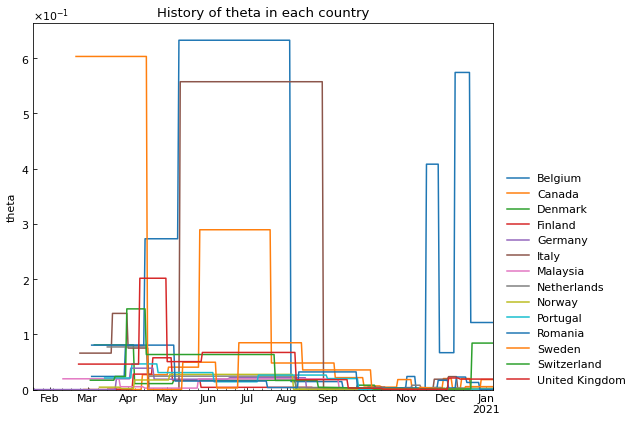

Country,Belgium,Canada,Denmark,Finland,Germany,Italy,Malaysia,Netherlands,Norway,Portugal,Romania,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,
2021-01-02,0.121533,0.018295,0.001799,0.001229,0.000121,0.002104,0.000662,0.001806,0.002172,0.001015,0.000488,0.005572,0.084318,0.019197
2021-01-03,0.121533,0.018295,0.001799,0.001229,0.000121,0.002104,0.000662,0.001806,0.002172,0.001015,0.000488,0.005572,0.084318,0.019197
2021-01-04,0.121533,0.018295,0.001799,0.001229,0.000121,0.002104,0.000662,0.001806,0.002172,0.001015,0.000488,0.005572,0.084318,0.019197
2021-01-05,0.121533,0.018295,0.001799,0.001229,0.000121,0.002104,0.000662,0.001806,0.002172,0.001015,0.000488,0.005572,0.084318,0.019197
2021-01-06,0.121533,0.018295,0.001799,0.001229,0.000121,0.002104,0.000662,0.001806,0.002172,0.001015,0.000488,0.005572,0.084318,0.019197


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49965 entries, 0 to 50146
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 49965 non-null  datetime64[ns]
 1   Country                              49965 non-null  object        
 2   Rt                                   49965 non-null  float64       
 3   theta                                49965 non-null  float64       
 4   kappa                                49965 non-null  float64       
 5   rho                                  49965 non-null  float64       
 6   sigma                                49965 non-null  float64       
 7   School_closing                       49965 non-null  int64         
 8   Workplace_closing                    49965 non-null  int64         
 9   Cancel_events                        49965 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.108170,-0.057217,0.666508,-0.448031,-0.212114,-0.176168,-0.169703,-0.254545,-0.162913,-0.161261,-0.176203,-0.349981,-0.120446,-0.283104,-0.199128,-0.237402
theta,-0.108170,1.000000,0.527870,-0.170178,-0.231482,0.164182,-0.087189,-0.008172,-0.143285,0.220203,-0.056092,0.097505,-0.147501,-0.110974,-0.170910,0.126570,-0.110109
kappa,-0.057217,0.527870,1.000000,0.184640,-0.152058,-0.146842,-0.280571,-0.099795,-0.195927,-0.087982,-0.203594,-0.202926,-0.187411,-0.292322,-0.233397,0.024527,-0.242479
rho,0.666508,-0.170178,0.184640,1.000000,-0.270309,-0.269813,-0.266028,-0.274641,-0.299740,-0.238344,-0.251349,-0.286228,-0.367239,-0.155194,-0.285882,-0.164055,-0.228117
sigma,-0.448031,-0.231482,-0.152058,-0.270309,1.000000,0.195972,0.109453,0.152006,0.290145,-0.008506,-0.030517,0.010898,0.210493,0.226493,0.201623,0.068088,0.188075
School_closing,-0.212114,0.164182,-0.146842,-0.269813,0.195972,1.000000,0.428997,0.125867,0.183555,0.065361,0.376111,0.234156,0.251461,0.327329,0.159921,0.097783,0.477666
Workplace_closing,-0.176168,-0.087189,-0.280571,-0.266028,0.109453,0.428997,1.000000,0.234883,0.681275,0.195837,0.606320,0.411795,0.239967,0.370187,0.183602,-0.057511,0.749120
Cancel_events,-0.169703,-0.008172,-0.099795,-0.274641,0.152006,0.125867,0.234883,1.000000,0.394168,0.368756,0.358137,0.635673,0.122521,0.401837,-0.034512,0.008637,0.357909
Gatherings_restrictions,-0.254545,-0.143285,-0.195927,-0.299740,0.290145,0.183555,0.681275,0.394168,1.000000,0.231039,0.493530,0.422399,0.280247,0.414594,0.187878,-0.084066,0.768752
Transport_closing,-0.162913,0.220203,-0.087982,-0.238344,-0.008506,0.065361,0.195837,0.368756,0.231039,1.000000,0.286028,0.555079,-0.088531,0.158821,-0.116915,-0.100197,0.323932


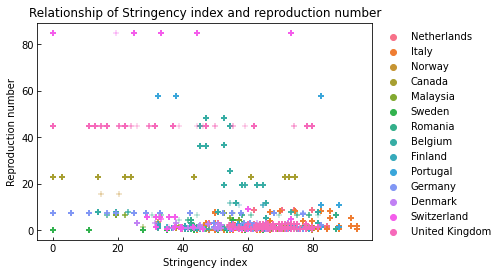

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()